In [1]:
import random
import numpy as np
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import math
import scipy.stats as stats
from datetime import datetime, timedelta
import statsmodels.api as sm
%matplotlib inline

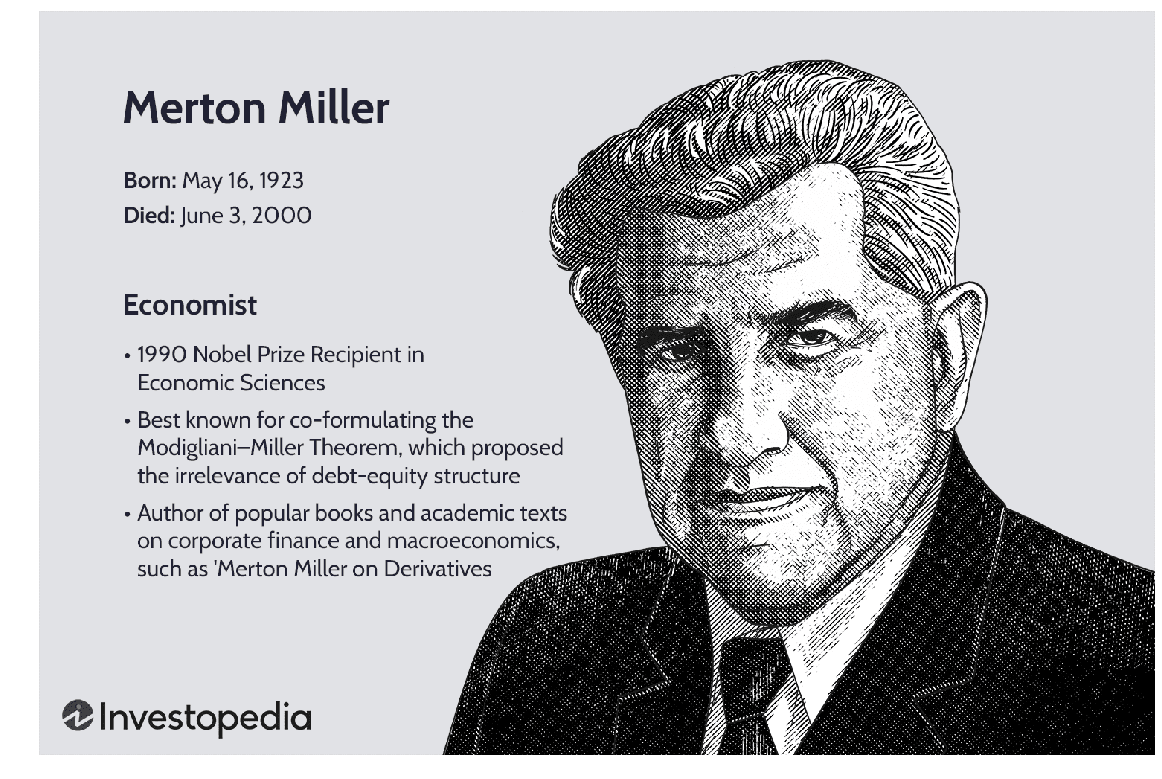

In [2]:
plt.figure(figsize = (20,20))
pic=plt.imread("C:\\Users\\nafissaad\\Desktop\\merton-miller_final-efd4279af2ba4b4fab9d464ed177da6b.png")
plt.imshow(pic)
plt.axis('off')
plt.show()

In [3]:
tickers=['^GSPC','TSLA','AAPL','MSFT','WMT','CAT']

In [4]:
df=yf.download(tickers,start='2010-09-15',end='2020-09-15')['Close']

[*********************100%***********************]  6 of 6 completed


In [5]:
df

,AAPL,CAT,MSFT,TSLA,WMT,^GSPC
Date,,,,,,
2010-09-14,9.573571,71.830002,25.030001,1.408000,52.660000,1121.099976
2010-09-15,9.650714,72.129997,25.120001,1.465333,52.860001,1125.069946
2010-09-16,9.877500,72.000000,25.330000,1.396000,53.150002,1124.660034
2010-09-17,9.834643,73.180000,25.219999,1.348667,53.009998,1125.589966
2010-09-20,10.115357,74.750000,25.430000,1.404000,53.540001,1142.709961
...,...,...,...,...,...,...
2020-09-08,112.820000,148.520004,202.660004,110.070000,138.449997,3331.840088
2020-09-09,117.320000,152.690002,211.289993,122.093330,139.889999,3398.959961
2020-09-10,113.489998,149.860001,205.369995,123.779999,136.809998,3339.189941


In [6]:
df1=df[tickers[1:]].pct_change()
df1

,TSLA,AAPL,MSFT,WMT,CAT
Date,,,,,
2010-09-14,NaN,NaN,NaN,NaN,NaN
2010-09-15,0.040719,0.008058,0.003596,0.003798,0.004176
2010-09-16,-0.047315,0.023499,0.008360,0.005486,-0.001802
2010-09-17,-0.033906,-0.004339,-0.004343,-0.002634,0.016389
2010-09-20,0.041028,0.028543,0.008327,0.009998,0.021454
...,...,...,...,...,...
2020-09-08,-0.210628,-0.067295,-0.054096,-0.030666,0.002295
2020-09-09,0.109233,0.039887,0.042584,0.010401,0.028077
2020-09-10,0.013815,-0.032646,-0.028018,-0.022017,-0.018534


In [7]:
mat=pd.DataFrame(columns=[tickers[1:]],index=[['Return','Risk','Beta','E(Return)']])
mat

,TSLA,AAPL,MSFT,WMT,CAT
Return,NaN,NaN,NaN,NaN,NaN
Risk,NaN,NaN,NaN,NaN,NaN
Beta,NaN,NaN,NaN,NaN,NaN
E(Return),NaN,NaN,NaN,NaN,NaN


In [8]:
mat.loc['Return','TSLA']=np.prod(1+df1.TSLA)**(1/10)-1
mat.loc['Return','AAPL']=np.prod(1+df1.AAPL)**(1/10)-1
mat.loc['Return','MSFT']=np.prod(1+df1.MSFT)**(1/10)-1
mat.loc['Return','WMT']=np.prod(1+df1.WMT)**(1/10)-1
mat.loc['Return','CAT']=np.prod(1+df1.CAT)**(1/10)-1
mat.loc['Risk','TSLA']=df1.TSLA.std()*np.sqrt(252)
mat.loc['Risk','AAPL']=df1.AAPL.std()*np.sqrt(252)
mat.loc['Risk','MSFT']=df1.MSFT.std()*np.sqrt(252)
mat.loc['Risk','WMT']=df1.WMT.std()*np.sqrt(252)
mat.loc['Risk','CAT']=df1.CAT.std()*np.sqrt(252)
mat

,TSLA,AAPL,MSFT,WMT,CAT
Return,0.583847,0.28262,0.234287,0.100589,0.078905
Risk,0.557152,0.28027,0.25514,0.193499,0.286347
Beta,NaN,NaN,NaN,NaN,NaN
E(Return),NaN,NaN,NaN,NaN,NaN


In [9]:
df1.cov()*252

,TSLA,AAPL,MSFT,WMT,CAT
TSLA,0.310418,0.048273,0.046387,0.015287,0.040881
AAPL,0.048273,0.078551,0.039048,0.016044,0.036276
MSFT,0.046387,0.039048,0.065096,0.018420,0.036651
WMT,0.015287,0.016044,0.018420,0.037442,0.015869
CAT,0.040881,0.036276,0.036651,0.015869,0.081995


In [10]:
portfolio=pd.DataFrame(columns=[tickers[1:]],index=['Weights'])
portfolio.loc['Weights',tickers[1:]]=[1/5 for i in range(5)]
portfolio['Total']=1
portfolio

,TSLA,AAPL,MSFT,WMT,CAT,Total
Weights,0.2,0.2,0.2,0.2,0.2,1


In [11]:
sum(portfolio.loc['Weights',tickers[1:]].values*mat.loc['Return',tickers[1:]].values)

array([0.11676940143784381, 0.05652407097814116, 0.04685735340530082,
       0.020117865161577122, 0.015780936452093774], dtype=object)

In [12]:
0.2*0.583847

0.11676940000000001

In [13]:
0.11676940143784381+0.05652407097814116+0.04685735340530082+0.020117865161577122+0.015780936452093774

0.2560496274349567

In [14]:
returns=(portfolio.loc['Weights',tickers[1:]].values*mat.loc['Return',tickers[1:]].values).sum()
risk=(portfolio.loc['Weights',tickers[1:]].values.T.dot((df1.cov()*252).dot(portfolio.loc['Weights',tickers[1:]].values)))**(1/2)
returns,risk

(0.2560496274349567, 0.21906832432342613)

In [15]:
Theta=3#1 to 5 1 means the investor hate risk less, 5 means the investor hate risk a lot
utility=returns-Theta/2*risk**2
utility

0.18406323135214597

In [16]:
portfolio.loc['Weights',tickers[1:]].values.dot(mat.loc['Return',tickers[1:]].values.mean()).sum()

0.2560496274349567

In [17]:
p_wt  =[]
util=[]
for x in range(30000):
    p_weights=np.random.random(len(tickers[1:]))
    p_weights/=np.sum(p_weights)
    returns=p_weights.dot(mat.loc['Return',tickers[1:]].values.mean()).sum()
    risk=(p_weights.T.dot((df1.cov()*252).dot(p_weights)))**(1/2)
    utility=returns-Theta/2*risk**2
    p_wt.append(p_weights)
    util.append(utility)

p_wt = np.array(p_wt)
util= np.array(util)

    
util,p_wt

(array([0.1617183 , 0.19977227, 0.19788309, ..., 0.19637174, 0.17462754,
        0.187484  ]),
 array([[0.24378397, 0.07876495, 0.43408515, 0.02433   , 0.21903594],
        [0.14159812, 0.12379846, 0.24418264, 0.3614018 , 0.12901898],
        [0.08017431, 0.4271799 , 0.03559554, 0.32967919, 0.12737106],
        ...,
        [0.13402595, 0.04248984, 0.37193441, 0.30174813, 0.14980168],
        [0.21446483, 0.13980627, 0.40607376, 0.11614481, 0.12351033],
        [0.11726221, 0.11327345, 0.33353503, 0.12484741, 0.3110819 ]]))

In [18]:
SR_IDX=np.argmax(util)
SR_IDX

19711

In [19]:
p_wt[SR_IDX]

array([0.02246494, 0.12569866, 0.1811382 , 0.6120989 , 0.0585993 ])

In [20]:
util[SR_IDX]

0.21134365484745868

In [21]:
p_wt[SR_IDX][0],p_wt[SR_IDX][1],p_wt[SR_IDX][2],p_wt[SR_IDX][3],p_wt[SR_IDX][4]

(0.022464943683607665,
 0.12569866100961388,
 0.18113819841360662,
 0.6120988986165008,
 0.05859929827667114)

In [22]:
SP500_returns=np.prod(1+df['^GSPC'].pct_change())**(1/10)-1
Risk_free_rate=0.67

In [23]:
x=sm.add_constant(df['^GSPC'].pct_change().dropna())
for i in tickers[1:]:
    model=sm.OLS(df1[i].dropna(),x)
    results=model.fit()
    mat.loc['Beta',i]=results.params[1]

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CAT   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2856.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:38:42   Log-Likelihood:                 7490.3
No. Observations:                2517   AIC:                        -1.498e+04
Df Residuals:                    2515   BIC:                        -1.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.552      0.581      -0.001       0.000
^GSPC          1.2048      0.023     53.440      0.000       1.161       1.249
==============================================================================
Omnibus:                      293.748   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2870.051
Skew:                           0.028   Prob(JB):                         0.00
Kurtosis:                       8.231   Cond. No.                         91.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
for i in tickers[1:]:
    e=Risk_free_rate+((mat.loc['Beta',i].values*SP500_returns)-Risk_free_rate)
    print(e)
    mat.loc['E(Return)',i]=e

[[0.14912838292281572]]
[[0.12370411984596974]]
[[0.12893116011827288]]
[[0.06219112726515996]]
[[0.14071544357834376]]


In [26]:
mat

,TSLA,AAPL,MSFT,WMT,CAT
Return,0.583847,0.28262,0.234287,0.100589,0.078905
Risk,0.557152,0.28027,0.25514,0.193499,0.286347
Beta,1.27686,1.059174,1.103928,0.53249,1.204827
E(Return),0.149128,0.123704,0.128931,0.062191,0.140715


In [27]:
p_wt  =[]
util=[]
for x in range(30000):
    p_weights=np.random.random(len(tickers[1:]))
    p_weights/=np.sum(p_weights)
    returns=p_weights.dot(mat.loc['E(Return)',tickers[1:]].values).sum()
    risk=(p_weights.T.dot((df1.cov()*252).dot(p_weights)))**(1/2)
    utility=returns-Theta/2*risk**2
    p_wt.append(p_weights)
    util.append(utility)

p_wt = np.array(p_wt)
util= np.array(util)

    
util,p_wt

(array([ 0.03224865, -0.00408252,  0.05950204, ...,  0.0455797 ,
         0.03615056,  0.0610549 ]),
 array([[0.29905385, 0.1780464 , 0.08111932, 0.24314637, 0.19863406],
        [0.42936705, 0.15798911, 0.10947357, 0.26230053, 0.04086975],
        [0.11810463, 0.37425084, 0.1597919 , 0.27826617, 0.06958646],
        ...,
        [0.12845004, 0.34677217, 0.08040756, 0.09223377, 0.35213647],
        [0.26651336, 0.2534041 , 0.2138014 , 0.21287926, 0.05340188],
        [0.02625026, 0.13192479, 0.32137173, 0.18951454, 0.33093868]]))

In [28]:
SR_IDX=np.argmax(util)
SR_IDX

19748

In [29]:
p_wt[SR_IDX]

array([0.01486355, 0.10730142, 0.15572131, 0.5812367 , 0.14087702])

In [30]:
util[SR_IDX]

0.07656985292237754

In [31]:
returns=(p_wt[SR_IDX]*mat.loc['E(Return)',tickers[1:]].values.mean()).sum()
risk=(p_wt[SR_IDX].T.dot((df1.cov()*252).dot(p_wt[SR_IDX])))**(1/2)
returns,risk

(0.1209340467461124, 0.1719771182914263)

In [32]:
np.linalg.inv(df1.cov()*252)

array([[ 3.72827359, -1.22750782, -1.58681106,  0.04517485, -0.61520241],
       [-1.22750782, 19.87267758, -8.07307969, -2.29345145, -4.12754493],
       [-1.58681106, -8.07307969, 26.70212286, -6.33956872, -6.34596796],
       [ 0.04517485, -2.29345145, -6.33956872, 31.77615995, -2.32379952],
       [-0.61520241, -4.12754493, -6.34596796, -2.32379952, 17.61505828]])

In [33]:
inverse=pd.DataFrame(columns=[tickers[1:]],index=[tickers[1:]])

In [34]:
inverse.loc['TSLA']=np.linalg.inv(df1.cov()*252)[0]
inverse.loc['AAPL']=np.linalg.inv(df1.cov()*252)[1]
inverse.loc['MSFT']=np.linalg.inv(df1.cov()*252)[2]
inverse.loc['WMT']=np.linalg.inv(df1.cov()*252)[3]
inverse.loc['CAT']=np.linalg.inv(df1.cov()*252)[4]
inverse

,TSLA,AAPL,MSFT,WMT,CAT
TSLA,3.728274,-1.227508,-1.586811,0.045175,-0.615202
AAPL,-1.227508,19.872678,-8.07308,-2.293451,-4.127545
MSFT,-1.586811,-8.07308,26.702123,-6.339569,-6.345968
WMT,0.045175,-2.293451,-6.339569,31.77616,-2.3238
CAT,-0.615202,-4.127545,-6.345968,-2.3238,17.615058


In [35]:
e_vec=pd.DataFrame(columns=[tickers[1:]],index=[['e-vector','r-vector','h-vector','g-vector']])
e_vec.loc['e-vector']=[1 for i in range(5)]
e_vec.loc['r-vector']=mat.loc['E(Return)'].values
e_vec

,TSLA,AAPL,MSFT,WMT,CAT
e-vector,1,1,1,1,1
r-vector,0.149128,0.123704,0.128931,0.062191,0.140715
h-vector,NaN,NaN,NaN,NaN,NaN
g-vector,NaN,NaN,NaN,NaN,NaN


In [36]:
e_vec.loc['h-vector']=np.dot(e_vec.loc['e-vector'],inverse)
e_vec.loc['g-vector']=np.dot(e_vec.loc['r-vector'],inverse)
e_vec

,TSLA,AAPL,MSFT,WMT,CAT
e-vector,1,1,1,1,1
r-vector,0.149128,0.123704,0.128931,0.062191,0.140715
h-vector,0.343927,4.151094,4.356695,20.864515,4.202543
g-vector,0.115795,0.510963,0.920183,0.55486,0.91366


In [37]:
alpha=np.dot(e_vec.loc['e-vector'],e_vec.loc['h-vector'].T)[0][0]
beta=np.dot(e_vec.loc['e-vector'],e_vec.loc['g-vector'].T)[0][0]
gamma=np.dot(e_vec.loc['r-vector'],e_vec.loc['g-vector'].T)[0][0]
delta=alpha*gamma-beta**2
alpha,beta,gamma,delta

(33.9187748649068, 3.015460971037969, 0.36219023392078586, 3.1920441347738144)

In [38]:
weights=pd.DataFrame(columns=[tickers[1:]],index=['Weights','Targeted Weights'])
weights.loc['Weights']=(e_vec.loc['h-vector']/alpha).values
weights#the optimal asset allocation that has minimum variance

,TSLA,AAPL,MSFT,WMT,CAT
Weights,0.01014,0.122383,0.128445,0.615132,0.1239
Targeted Weights,NaN,NaN,NaN,NaN,NaN


In [39]:
risk=(weights.loc['Weights',tickers[1:]].values.T.dot((df1.cov()*252).dot(weights.loc['Weights',tickers[1:]].values)))**(1/2)
risk#lower risk than the min risker asset of the portfolio WMT(risk 0.19)

0.17170380579461153

In [40]:
returns=(weights.loc['Weights',tickers[1:]].values*e_vec.loc['r-vector',tickers[1:]].values.mean()).sum()
returns

0.12093404674611241

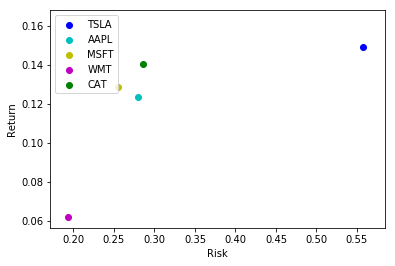

In [41]:
colors = ['b', 'c', 'y', 'm','g']
values = [0, 1, 2, 3, 4]
for i in tickers[1:]:
    plt.scatter(x=np.array(np.array(mat.loc['Risk',i])),y=np.array(np.array(mat.loc['E(Return)',i])),c=colors[tickers[1:].index(i)])
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.legend(tickers[1:])    

In [42]:
Targeted_return=0.09
Lambda=(gamma-beta*Targeted_return)/delta
mu=(alpha*Targeted_return-beta)/delta
Lambda,mu

(0.028445329291727526, 0.011662986234455879)

In [43]:
np.array((Lambda*e_vec.loc['h-vector']))+np.array(mu*e_vec.loc['g-vector'])

array([[0.011133639460186803, 0.12403857729868369, 0.13465972097352752,
        0.5999693306155989, 0.13019873165200282]], dtype=object)

In [44]:
weights.loc['Targeted Weights']=np.array((Lambda*e_vec.loc['h-vector']))+np.array(mu*e_vec.loc['g-vector'])

In [45]:
weights

,TSLA,AAPL,MSFT,WMT,CAT
Weights,0.01014,0.122383,0.128445,0.615132,0.1239
Targeted Weights,0.011134,0.124039,0.13466,0.599969,0.130199


In [46]:
(weights.loc['Targeted Weights',tickers[1:]].values*e_vec.loc['r-vector',tickers[1:]].values).sum()

0.08999999999999994

In [47]:
(weights.loc['Targeted Weights',tickers[1:]].values.T.dot((df1.cov()*252).dot(weights.loc['Targeted Weights',tickers[1:]].values)))**(1/2)

0.171741078524704

In [48]:
weights.loc['Targeted Weights',tickers[1:]].sum()

0.9999999999999997